Visualization for validation loss and accuracy of best model (EEGNet)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()


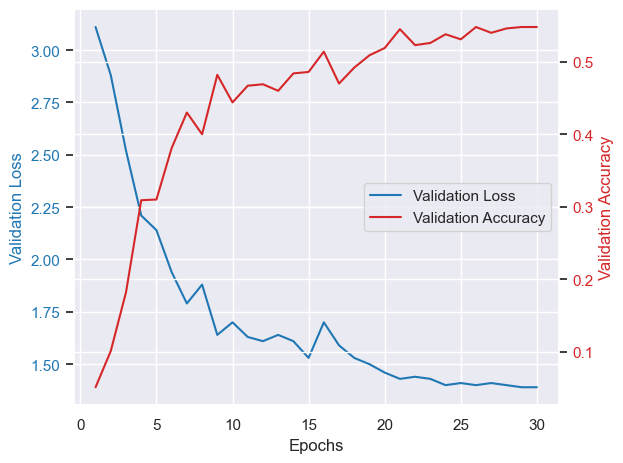

In [4]:
#Values obtained from the wandb log-file
val_loss = [3.110, 2.880, 2.520, 2.210, 2.140, 1.940, 1.790, 1.880, 1.640, 1.700, 1.630, 1.610, 1.640, 1.610, 1.530, 1.70, 1.590, 1.530, 1.500, 1.460, 1.430, 1.440, 1.430, 1.400, 1.410, 1.400, 1.410, 1.400, 1.390, 1.390]
val_acc = [0.051, 0.101, 0.182, 0.309, 0.310, 0.381, 0.430, 0.400, 0.482, 0.444, 0.467, 0.469, 0.460, 0.484, 0.486, 0.514, 0.470, 0.492, 0.509, 0.519, 0.545, 0.523, 0.526, 0.538, 0.531, 0.548, 0.540, 0.546, 0.548, 0.548]

epochs = range(1, 31)

fig, ax1 = plt.subplots()

# Plotting validation loss
color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Validation Loss', color=color)
loss_plot, = ax1.plot(epochs, val_loss, color=color, label='Validation Loss')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for validation accuracy
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Validation Accuracy', color=color)
accuracy_plot, = ax2.plot(epochs, val_acc, color=color, label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

# Adding the legend in the middle right of the plot
plt.legend(handles=[loss_plot, accuracy_plot], loc='center right')

fig.tight_layout()  # To ensure the right y-label is not clipped
plt.show()

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
from scipy.stats import wilcoxon

eegnet = np.array([52.5, 40.2, 15.5, 51.2, 11.5, 29.3, 48.7, 25.9])
avg_eegnet = np.mean(eegnet)

tsception = np.array([43.3, 25.5, 12., 35.3, 8, 19.7, 27.2, 10.1])
avg_tsception = np.mean(tsception)

conformer = np.array([41.3, 19.3, 11, 33.7, 8.8, 20.2, 14.3])
avg_conformer = np.mean(conformer)

channelnet = np.array([37.9, 12.1, 7.3, 27.8, 5.8, 9.3, 19.8, 5])
avg_channelnet = np.mean(channelnet)

eeg2img = np.array([5.0, 5.7, 5.7, 9.2, 6.0, 6.7, 8.8, 4.5])
avg_eeg2img = np.mean(eeg2img)

models = [eegnet, tsception, channelnet, conformer, eeg2img]
model_names = ["EEGNet", "TSCeption", "Conformer", "ChannelNet", "EEG-to-Image"]
for i in range(len(models)):
    if len(models[i]) == len(eegnet) and models[i] is not eegnet: 
        print(f"EEGNet vs. {model_names[i]}")
        print(f"Means: EEGNet: {avg_eegnet}, {model_names[i]}: {np.mean(models[i])}")
        print(wilcoxon(eegnet, models[i], alternative='greater')) 
    else:
        pass


EEGNet vs. TSCeption
Means: EEGNet: 34.35, TSCeption: 22.6375
WilcoxonResult(statistic=36.0, pvalue=0.00390625)
EEGNet vs. Conformer
Means: EEGNet: 34.35, Conformer: 15.625
WilcoxonResult(statistic=36.0, pvalue=0.00390625)
EEGNet vs. EEG-to-Image
Means: EEGNet: 34.35, EEG-to-Image: 6.449999999999999
WilcoxonResult(statistic=36.0, pvalue=0.00390625)


In [64]:
np.std(eegnet)

15.11555490215295

In [10]:
#CV
eegnet_cv1 = np.array([54.8, 52.6, 52.5, 52.5, 51.3, 50, 47.3, 47.2, 41.7, 41.3, 38.9])
eegnet_cv2 = np.array([47.4, 43.8, 41.1, 40.8, 40.5, 40.4, 39.3, 38.6, 35.7, 30.2, 5.5])
eegnet_cv3 = np.array([23.6, 22.9, 20.7, 19.8, 17.6, 17.4, 14.8, 14.2, 13.7, 11.3])
eegnet_cv4 = np.array([48.6, 47.3, 43.3, 42.2, 41.8, 40.7, 38.7, 34.6, 9.2])
eegnet_cv5 = np.array([17.4, 17.2, 15.3, 15.3, 14.2, 13.5, 13.3, 11.7, 11.5, 9.3, 8.4])
eegnet_cv6 = np.array([31.0, 29.5, 29.5, 28.3, 27.9, 27.2, 25.6, 21.2, 18.9, 16.9, 15.3])
eegnet_cv7 = np.array([57.7, 57.6, 56.7, 53.5, 50.1, 49.3, 48.3, 48.2, 47.5, 29.4])
eegnet_cv8 = np.array([24.2, 23.3, 21.3, 21.2, 20.6, 18.6, 17.8, 16.4, 15.0, 10.8])
avg_eegnet_cv1 = np.mean(eegnet_cv1)
avg_eegnet_cv2 = np.mean(eegnet_cv2)
avg_eegnet_cv3 = np.mean(eegnet_cv3)
avg_eegnet_cv4 = np.mean(eegnet_cv4)
avg_eegnet_cv5 = np.mean(eegnet_cv5)
avg_eegnet_cv6 = np.mean(eegnet_cv6)
avg_eegnet_cv7 = np.mean(eegnet_cv7)
avg_eegnet_cv8 = np.mean(eegnet_cv8)
avg_eegnet_cv = np.mean([avg_eegnet_cv1, avg_eegnet_cv2, avg_eegnet_cv3, avg_eegnet_cv4, avg_eegnet_cv5, avg_eegnet_cv6, avg_eegnet_cv7, avg_eegnet_cv8])
avg_eegnet_cv

30.966224747474747

In [12]:
eegnet_cv = [avg_eegnet_cv1, avg_eegnet_cv2, avg_eegnet_cv3, avg_eegnet_cv4, avg_eegnet_cv5, avg_eegnet_cv6, avg_eegnet_cv7, avg_eegnet_cv8]
print(wilcoxon(eegnet, eegnet_cv, alternative='greater')) 

WilcoxonResult(statistic=30.0, pvalue=0.0546875)


In [4]:
eegnet_embedding = np.array([52.9, 39.2, 15.2, 51.5, 11.5, 30.7, 50.8, 25.2])
avg_eegnet_embedding = np.mean(eegnet_embedding)
wilcoxon(eegnet, eegnet_embedding)

c:\Users\s_gue\anaconda3\envs\vision\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\s_gue\anaconda3\envs\vision\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=11.0, pvalue=0.6120898800892568)

In [5]:
avg_eegnet_embedding

34.625

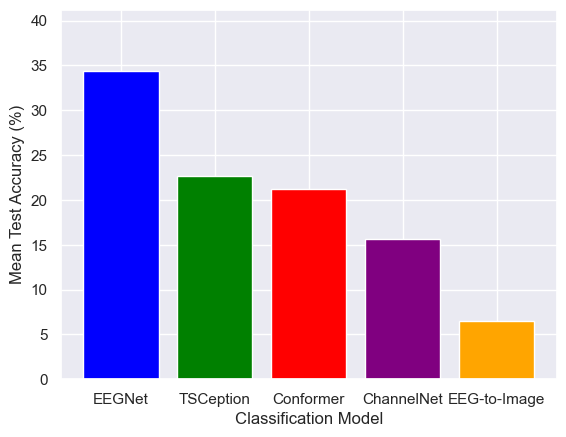

In [2]:
means = [avg_eegnet, avg_tsception,  avg_conformer, avg_channelnet, avg_eeg2img]

# Setting up the x-coordinates for the bars
x = range(len(means))

# Create the bar chart
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.bar(x, means, color=colors) 

# Setting the labels for the x-axis
plt.xticks(x, model_names)

# Adjust the ylim to add more space above the bars for p-values
upper_limit = max(means) * 1.2  # Adjust the multiplier as needed
plt.ylim(0, upper_limit)

# Adding titles and labels
plt.xlabel('Classification Model', fontsize=12)
plt.ylabel('Mean Test Accuracy (%)', fontsize=12)

# Display the plot
plt.show()

Test Model Analysis per Image Class

In [3]:
import os
import torch
import torch.nn as nn
import pytorch_lightning as pl
import yaml

from pytorch.data_setup.DataModule import DataModule
from pytorch.models.EEGNet import EEGNetv4

def read_config(config_path: str):
    with open(config_path) as file:
        config = yaml.load(file, Loader=yaml.FullLoader)
    return config

os.chdir("c:/Users/s_gue/Desktop/master_project/sven-thesis")
config = read_config(config_path = "./pytorch/configs/test/P001/P001_EEGNet_test.yaml")

model_config = config["parameters"]["model"]["parameters"]
dm_config = config["parameters"]["datamodule"]["parameters"]
model_config = {key: model_config[key]["value"] for key in model_config}
dm_config = {key: dm_config[key]["value"] for key in dm_config}

model = EEGNetv4(**model_config) 
ckpt_path = "C:/Users/s_gue/Desktop/master_project/sven-thesis/final_classification_ckpts/P001/EEGNet_P001.ckpt"
checkpoint = torch.load(ckpt_path)
model.load_state_dict(checkpoint['state_dict'])

# def updated_forward(self, x):
#     x = self.partial_forward(x) # [1 16 1 15] #bs x F2 x 1 x 15 (128*15)
#     x = x.flatten(start_dim=1) # bs x F2*15
#     x = self.embedding(x) # bs x 1024
#     return x

#model.forward = updated_forward.__get__(model)
model.eval()
model.freeze()
trainer = pl.Trainer()
dm = DataModule(**dm_config)
trainer.test(model = model, datamodule = dm)

c:\Users\s_gue\anaconda3\envs\vision\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] Die angegebene Prozedur wurde nicht gefunden
  warn(f"Failed to load image Python extension: {e}")
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\s_gue\anaconda3\envs\vision\lib\site-packages\pytorch_lightning\trainer\setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
c:\Users\s_gue\anaconda3\envs\vision\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader

Testing: 0it [00:00, ?it/s]

TEST
TEST
TEST
TEST
TEST
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.5251677632331848
        test_loss           1.5478150844573975
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 1.5478150844573975, 'test_acc': 0.5251677632331848}]

In [15]:
gt = torch.cat(model.ground_truth, dim=0)
pred = torch.cat(model.predictions, dim=0)
class_names = ["Airliner", "Fish", "Banana", "Basketball", "Broccoli", "Castle", "Daisy", "Dog",
               "Face", "Jack-o-lantern", "Orange", "Panda", "Pizza", "Pretzel", "Red Wine", "School Bus",
               "Soccer Ball", "Strawberry", "Tennis Ball", "Tiger"]

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_metrics(predictions, ground_truth, num_classes, class_names):
    if len(class_names) != num_classes:
        raise ValueError("Length of class_names must be equal to num_classes")
    
    # Initialize metrics
    accuracy = torch.zeros(num_classes)
    sensitivity = torch.zeros(num_classes)
    specificity = torch.zeros(num_classes)
    precision = torch.zeros(num_classes)
    recall = torch.zeros(num_classes)
    confusion_matrix = torch.zeros(num_classes, num_classes)

    for cls in range(num_classes):

        # Accuracy per class
        accuracy[cls] = torch.sum((predictions == cls) & (ground_truth == cls))/30

        # True Positives (TP): correct positive predictions
        TP = torch.sum((predictions == cls) & (ground_truth == cls))

        # True Negatives (TN): correct negative predictions
        TN = torch.sum((predictions != cls) & (ground_truth != cls))

        # False Positives (FP): incorrect positive predictions
        FP = torch.sum((predictions == cls) & (ground_truth != cls))

        # False Negatives (FN): missed positive predictions
        FN = torch.sum((predictions != cls) & (ground_truth == cls))

        # Sensitivity (Recall) for this class
        sensitivity[cls] = TP / (TP + FN) if (TP + FN) > 0 else 0

        # Specificity for this class
        specificity[cls] = TN / (TN + FP) if (TN + FP) > 0 else 0

        # Precision for this class
        precision[cls] = TP / (TP + FP) if (TP + FP) > 0 else 0

        # Recall for this class
        recall[cls] = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Populate confusion matrix
    for i in range(len(predictions)):
        true_class = ground_truth[i]
        predicted_class = predictions[i]
        confusion_matrix[true_class][predicted_class] += 1

    # Plotting the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap='viridis', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    #plt.title('Confusion Matrix')
    plt.show()
    return accuracy, sensitivity, specificity, precision, recall, confusion_matrix

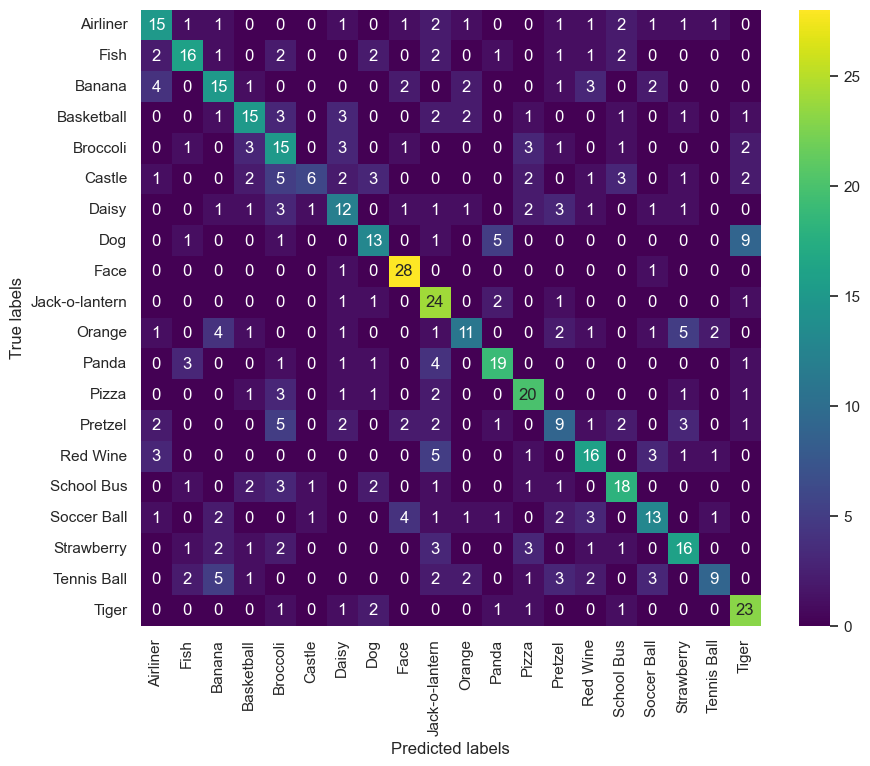

In [19]:
accuracy, sensitivity, specificity, precision, recall, confusion_matrix = calculate_metrics(pred, gt, 20, class_names)

Reconstruction results

In [3]:
top1_max = np.array([33.4, 26.6, 33.8, 42.4, 29.6, 46.0])
top1 = np.array([31.0, 22.0, 30.7, 36.8, 23.9, 41.2])

np.mean(top1_max), np.mean(top1)

(35.3, 30.933333333333337)

In [ ]:
# import os
# import torch
# import torch.nn as nn
# import pytorch_lightning as pl
# import yaml

# from pytorch.data_setup.DataModule import DataModule
# from pytorch.models.EEGNet_Embedding_version import EEGNet_Embedding

# def read_config(config_path: str):
#     with open(config_path) as file:
#         config = yaml.load(file, Loader=yaml.FullLoader)
#     return config

# os.chdir("c:/Users/s_gue/Desktop/master_project/sven-thesis")
# config = read_config(config_path = "./pytorch/EEG_encoder_setup/P008_model_config.yaml")

# model_config = config["parameters"]["model"]["parameters"]
# dm_config = config["parameters"]["datamodule"]["parameters"]
# model_config = {key: model_config[key]["value"] for key in model_config}
# dm_config = {key: dm_config[key]["value"] for key in dm_config}

# model = EEGNet_Embedding(**model_config) 
# #ckpt_path = "./results/wandb_logs/lightning_logs/86j6jurk/checkpoints/final-model-v1.ckpt" 
# ckpt_path = "C:/Users/s_gue/Desktop/master_project/sven-thesis/reconstruction/pretrains/EEG/final-model-P008.ckpt"
# checkpoint = torch.load(ckpt_path)
# model.load_state_dict(checkpoint['state_dict'])

# # def updated_forward(self, x):
# #     x = self.partial_forward(x) # [1 16 1 15] #bs x F2 x 1 x 15 (128*15)
# #     x = x.flatten(start_dim=1) # bs x F2*15
# #     x = self.embedding(x) # bs x 1024
# #     return x

# #model.forward = updated_forward.__get__(model)
# model.eval()
# model.freeze()
# trainer = pl.Trainer()
# dm = DataModule(**dm_config)
# trainer.test(model = model, datamodule = dm)

Extract and plot images

In [39]:
from PIL import Image
image_path = "C:/Users/s_gue/Desktop/master_project/sven-thesis/reconstruction/results/generation_test/01-12-2023-13-46-54_0to100/samples_test.png"
large_image = Image.open(image_path)


In [34]:
import os
# class_names = ["Airliner", "Fish", "Banana", "Basketball", "Broccoli", "Castle", "Daisy", "Dog",
#                "Face", "Jack-o-lantern", "Orange", "Panda", "Pizza", "Pretzel", "Red Wine", "School Bus",
#                "Soccer Ball", "Strawberry", "Tennis Ball", "Tiger"]

class_names = ["Blue Bird", "Cat", "Clock", "Golf Ball", "Horse", "Pineapple", "Police Truck", "Ship", "Sunflower", "Shark"]
for class_name in class_names:
    os.makedirs(f"C:/Users/s_gue/Desktop/master_project/sven-thesis/reconstruction/results/generation_test/selected_images_zero_shot/{class_name}", exist_ok=True)

In [ ]:
from PIL import Image

def extract_image(large_image_path, row, column, output_path=None, class_name=None, gt=True):
    """
    Extracts an image from the specified row and column from a larger image.

    Parameters:
    large_image_path (str): Path to the larger image.
    row (int): The row number of the desired image (0-indexed).
    column (int): The column number of the desired image (0-indexed).
    output_path (str, optional): Path to save the extracted image. If None, the image is not saved.
    class_name (str, optional): Name of the class the image belongs to. If provided, the image is saved in a subfolder with this name.

    Returns:
    Image: The extracted image.
    """
    image_size = 256
    border_size = 2

    # Calculate the starting x and y coordinates of the image
    start_x = column * (image_size + border_size) + border_size
    start_y = row * (image_size + border_size) + border_size

    # Open the large image
    large_image = Image.open(large_image_path)

    # Calculate the bounding box of the desired image
    bbox = (start_x, start_y, start_x + image_size, start_y + image_size)

    # Extract the image
    extracted_image = large_image.crop(bbox)
    
    # Save the image if an output path is provided
    if output_path:
        output_path = output_path+class_name+"/gt.png" if gt else output_path+class_name+"/pred.png"
        extracted_image.save(output_path)

    return extracted_image


# Example usage
image_path = "C:/Users/s_gue/Desktop/master_project/sven-thesis/reconstruction/results/generation_test/03-12-2023-00-16-48/samples_test.png"
small_image = extract_image(image_path, row=65, column=0)
small_image.show()

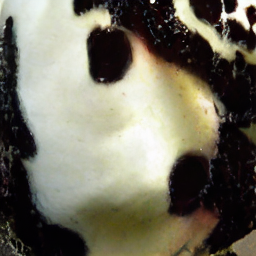

In [59]:
image_path = "C:/Users/s_gue/Desktop/master_project/sven-thesis/reconstruction/results/generation_test/advanced_test/samples_test.png"
output_path = "C:/Users/s_gue/Desktop/master_project/sven-thesis/reconstruction/results/generation_test/selected_images_zero_shot/"
class_name = "Shark"
row = 287
#Ground Truth
extract_image(image_path, row=row, column=0, output_path=output_path, class_name=class_name, gt=True)
#Predicted
extract_image(image_path, row=row, column=2, output_path=output_path, class_name=class_name, gt=False)

Create Figures out of positive and negative matches

In [113]:
os.getcwd()

'c:\\Users\\s_gue\\Desktop\\master_project\\sven-thesis\\notebooks'

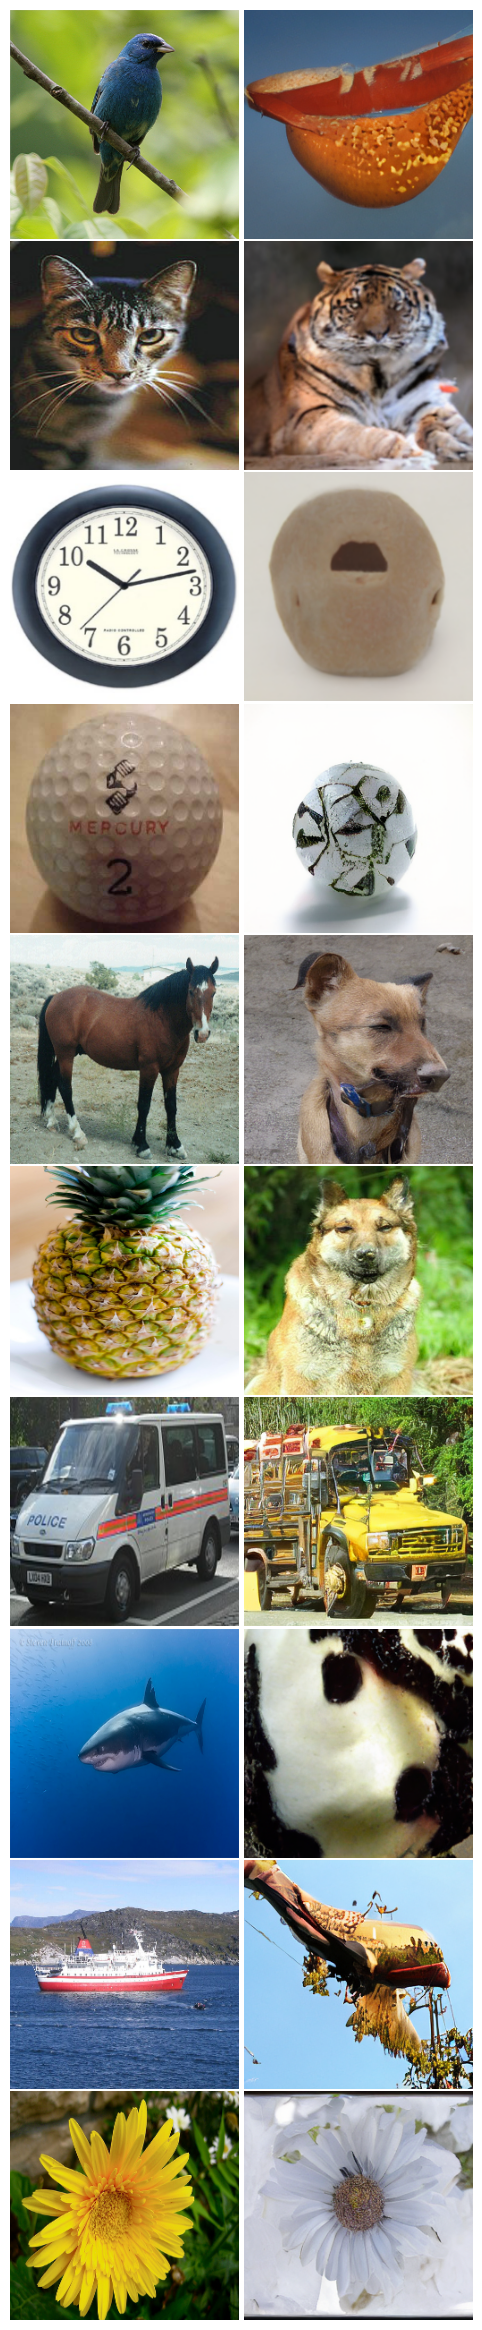

In [62]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set_theme()
from PIL import Image



def create_vertical_stack_figure(base_directory):
    categories = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]
    num_categories = len(categories)

    # Create a figure with subplots
    fig, axs = plt.subplots(num_categories, 2, figsize=(6, num_categories * 3))

    for i, category in enumerate(categories):
        # Define file paths
        gt_path = os.path.join(base_directory, category, 'gt.png')
        pred_path = os.path.join(base_directory, category, 'pred.png')

        # Load images
        gt_img = Image.open(gt_path)
        pred_img = Image.open(pred_path)

        # Display the images side by side
        axs[i, 0].imshow(gt_img)
        axs[i, 1].imshow(pred_img)

        # Remove axis and spacing
        axs[i, 0].axis('off')
        axs[i, 1].axis('off')
        axs[i, 0].set_xticklabels([])
        axs[i, 0].set_yticklabels([])
        axs[i, 1].set_xticklabels([])
        axs[i, 1].set_yticklabels([])

    # Adjust the layout
    plt.subplots_adjust(wspace=0.01, hspace=0.01)

    # Save the figure
    #plt.savefig('gt_pred_pairs.png', bbox_inches='tight')

    # Optionally display the figure
    plt.show()

base_dir = "C:/Users/s_gue/Desktop/master_project/sven-thesis/reconstruction/results/generation_test/selected_images_zero_shot"
create_vertical_stack_figure(base_dir)

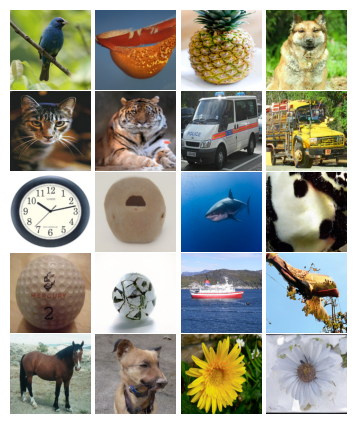

In [61]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set_theme()
from PIL import Image

def create_grid_figure(base_directory, output_path=None):
    categories = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]
    num_categories = len(categories)

    # Calculate the number of columns needed (each column has 5 rows)
    num_columns = -(-num_categories // 5)  # Ceiling division

    # Assuming each image is 256x256 pixels, set the figure size to match this aspect ratio
    # Adjust these values based on your images' dimensions
    fig_width_per_image = 1.1  # Width allocated for each image in inches
    fig_height_per_image = 1.05  # Height allocated for each image in inches
    fig_width = num_columns * fig_width_per_image * 2  # Two images per category (gt and pred)
    fig_height = 5 * fig_height_per_image

    # Create a figure with subplots
    fig, axs = plt.subplots(5, num_columns * 2, figsize=(fig_width, fig_height))

    for i, category in enumerate(categories):
        # Define file paths
        gt_path = os.path.join(base_directory, category, 'gt.png')
        pred_path = os.path.join(base_directory, category, 'pred.png')

        # Load images
        gt_img = Image.open(gt_path)
        pred_img = Image.open(pred_path)

        # Calculate row and column for subplot
        row = i % 5
        col = (i // 5) * 2  # Each category takes two columns: one for gt and one for pred

        # Display the images
        axs[row, col].imshow(gt_img)
        axs[row, col + 1].imshow(pred_img)

        # Remove axis and add separators
        for j in [col, col + 1]:
            axs[row, j].axis('off')

            
    # Adjust the layout with minimal spacing
    plt.subplots_adjust(wspace=0.01, hspace=0.01)


    # Save the figure
    if output_path:
        plt.savefig(output_path, bbox_inches='tight')

    # Optionally display the figure
    plt.show()

base_dir = "C:/Users/s_gue/Desktop/master_project/sven-thesis/reconstruction/results/generation_test/selected_images_zero_shot"
output_path = base_dir + "/grid_zero.png"
create_grid_figure(base_dir, output_path=output_path)